<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Praktikum%2005/Praktikum_Mandiri05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path jalur direktori tempat dataset disimpan di Google Drive
path = "/content/gdrive/MyDrive/Praktikum Mandiri 5"

In [4]:
# membaca file csv menggunakan pandas dan Menampilkan 5 Baris Pertama
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Mencari data yang hilang
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
# Mengecek Duplikat kalo ada data yang sama
df.duplicated().sum()

np.int64(0)

In [7]:
# Mengubah data ke numerik
species_map = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

df['Species'] = df['Species'].map(species_map)

In [8]:
# Siapkan data dengan menghapus kolom Id dan memisah fitur dan label
iris_data = df.drop(columns=['Id'])
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

In [9]:
# Split dataset menjadi training dan testing dengan stratify pada label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n Jumlah Data Training: {X_train.shape[0]}")
print(f" Jumlah Data Testing: {X_test.shape[0]}")


 Jumlah Data Training: 120
 Jumlah Data Testing: 30


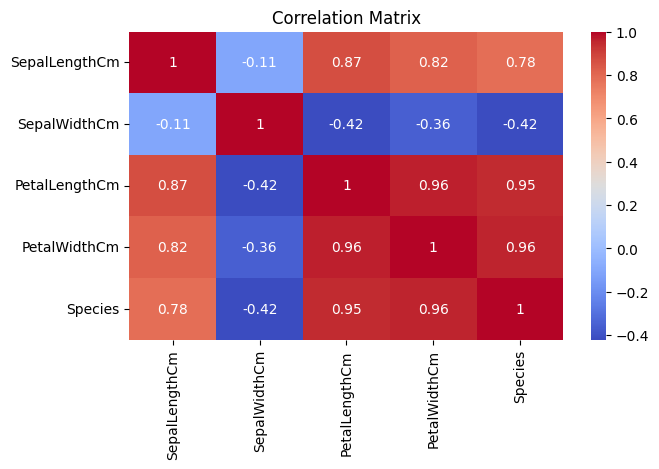

In [10]:
# Visualisasi Matriks Korelasi
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Buat dan latih Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [12]:
# Prediksi menggunakan dataset testing
y_pred = clf.predict(X_test)

In [13]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)* 100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=species_map.keys())

In [14]:
# Menampilkan Hasil Evaluasi
print(f'Akurasi: {accuracy:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Akurasi: 93.33%
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



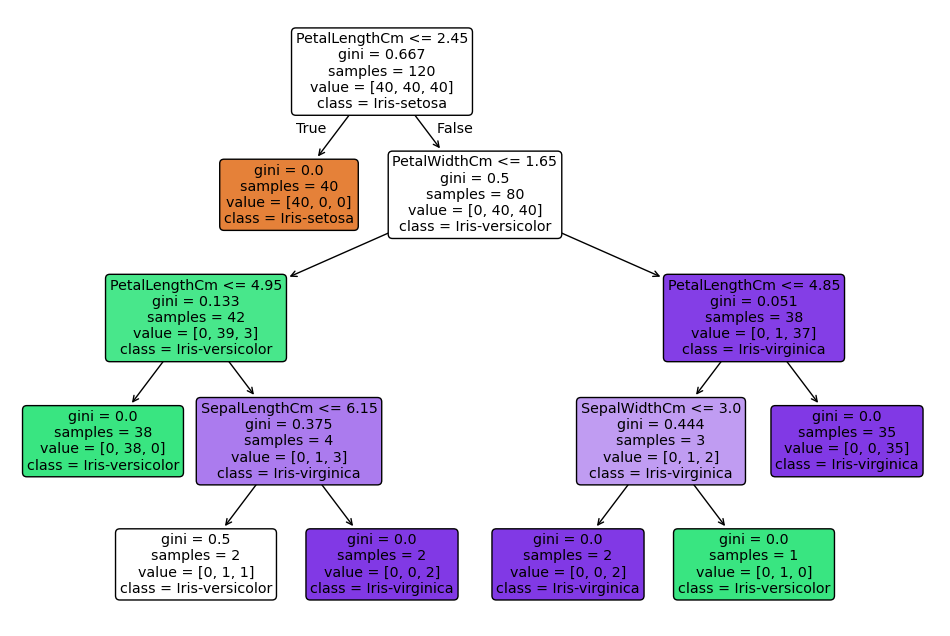

In [15]:
# Visualisasi Decision Tree
plt.figure(figsize=(12,8))

# Create a list of string class names based on the numerical classes
class_names_str = [list(species_map.keys())[i] for i in clf.classes_]

plot_tree(clf, feature_names=X.columns, class_names=class_names_str, filled=True, rounded=True)
plt.show()

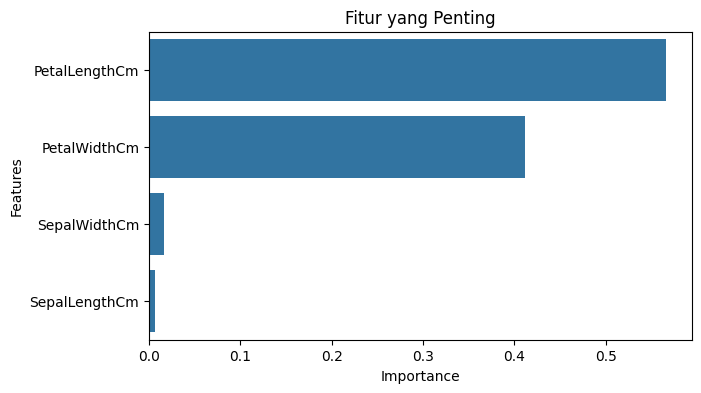

,0
PetalLengthCm,0.565639
PetalWidthCm,0.411154
SepalWidthCm,0.016878
SepalLengthCm,0.006329


In [16]:
# Fitur yang Penting
import seaborn as sns
imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Fitur yang Penting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
imp

In [17]:
# Melihat best max_depth
scores = {}
for i in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=i, random_state=42)
    m.fit(X_train, y_train)
    scores[i] = accuracy_score(y_test, m.predict(X_test))

scores
best_i = max(scores, key=scores.get)
print("Best max_depth:", {best_i}, "|Acc:", round(scores[best_i]*100, 2), "%")

Best max_depth: {3} |Acc: 96.67 %
